# EDA - Mobile User Behavior

- #### Estadística descriptiva
- #### Análisis univariado

## Importar librerias y cargar los datos

In [1]:
# Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos

dataset = pd.read_csv("user_behavior_dataset_clean.csv")

### Vista general del dataset

Visualizar todas las columnas y algunas metricas básicas

In [3]:
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,700.0,NaN,NaN,NaN,350.5,202.21688,1.0,175.75,350.5,525.25,700.0
device_model,700,5,Xiaomi Mi 11,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
operating_system,700,2,Android,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
app_usage_time_(min/day),700.0,NaN,NaN,NaN,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
screen_on_time_(hours/day),700.0,NaN,NaN,NaN,5.272714,3.068584,1.0,2.5,4.9,7.4,12.0
battery_drain_(mah/day),700.0,NaN,NaN,NaN,1525.158571,819.136414,302.0,722.25,1502.5,2229.5,2993.0
number_of_apps_installed,700.0,NaN,NaN,NaN,50.681429,26.943324,10.0,26.0,49.0,74.0,99.0
data_usage_(mb/day),700.0,NaN,NaN,NaN,929.742857,640.451729,102.0,373.0,823.5,1341.0,2497.0
age,700.0,NaN,NaN,NaN,38.482857,12.012916,18.0,28.0,38.0,49.0,59.0
gender,700,2,Male,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Estadística descriptiva (información general del dataset)

#### Média de las columnas numericas

Definición: Es el valor promedio de un conjunto de datos; representa una medida general 	de tendencia central. Se obtiene al sumar todos los valores y dividirlos entre la 	cantidad de elementos.

In [4]:
# Calcular média solamente de las columnas numéricas
dataset.select_dtypes(include='number').mean()

user_id                        350.500000
app_usage_time_(min/day)       271.128571
screen_on_time_(hours/day)       5.272714
battery_drain_(mah/day)       1525.158571
number_of_apps_installed        50.681429
data_usage_(mb/day)            929.742857
age                             38.482857
user_behavior_class              2.990000
dtype: float64

#### Moda de las columnas numéricas

Es el valor que más veces se repite en el conjunto de datos. Puede haber más 	de una moda (bimodal, multimodal) o ninguna. Es útil para identificar los valores más 	comunes o frecuentes.

In [5]:
# Calcular la moda de las columnas numéricas, excluyendo la columna 'user_id'
dataset.select_dtypes(include="number").drop(columns='user_id').mode().T

,0,1
app_usage_time_(min/day),64.0,NaN
screen_on_time_(hours/day),1.6,NaN
battery_drain_(mah/day),490.0,NaN
number_of_apps_installed,10.0,16.0
data_usage_(mb/day),122.0,284.0
age,34.0,51.0
user_behavior_class,2.0,NaN


#### Mediana de las columnas numericas

Definición: Es el valor central de los datos cuando se ordenan de menor a mayor. Si 	hay una cantidad impar de datos, es el del medio; si es par, es el promedio de los dos 	centrales. Es útil cuando hay valores extremos que pueden distorsionar la media.

In [6]:
dataset.select_dtypes(include='number').drop(columns='user_id').median()

app_usage_time_(min/day)       227.5
screen_on_time_(hours/day)       4.9
battery_drain_(mah/day)       1502.5
number_of_apps_installed        49.0
data_usage_(mb/day)            823.5
age                             38.0
user_behavior_class              3.0
dtype: float64

#### Rango de las columnas numericas

Definición: Es la diferencia entre el valor más alto y el más bajo del conjunto. Da uma 	idea rápida de la amplitud o dispersión de los datos, aunque no considera cómo están 	distribuidos internamente.

In [7]:
col_numericas = dataset.select_dtypes(include='number').drop(columns="user_id")
rango = col_numericas.max() - col_numericas.min()

print(rango)

app_usage_time_(min/day)       568.0
screen_on_time_(hours/day)      11.0
battery_drain_(mah/day)       2691.0
number_of_apps_installed        89.0
data_usage_(mb/day)           2395.0
age                             41.0
user_behavior_class              4.0
dtype: float64


#### Desviación estandar

Definición: Es una medida de dispersión que indica cuánto, en promedio, 	se alejan los valores respecto a la media. Cuanto mayor es la desviación estándar, 	más dispersos están los datos; cuanto menor, más agrupados están cerca de la 	media.

In [8]:
dataset.select_dtypes(include='number').drop(columns='user_id').std()

app_usage_time_(min/day)      177.199484
screen_on_time_(hours/day)      3.068584
battery_drain_(mah/day)       819.136414
number_of_apps_installed       26.943324
data_usage_(mb/day)           640.451729
age                            12.012916
user_behavior_class             1.401476
dtype: float64

## Análisis univariado

En el análisis univariado, podemos adoptar la siguiente estratégia para analizar cada variable:

* Variable categórica: Desarrollar análisis numérico y análisis gráfico
* Variable numérica: Desarrollar análisis numérico y gráfico.

### Análisis de la columna 'device_model' - Columna categórica - Análisis numérico

La primera columna en la que se hará el análisis es la columna "device_model", que informa los modelos que aparecen dentro del dataset

#### Conteo de frecuencias absolutas
Definición: Es la cantidad de veces que aparece cada categoría en la columna. Muestra cuántas observaciones pertenecen a cada grupo.

In [9]:
dataset['device_model'].value_counts().rename_axis('device_model').reset_index(name='count')

,device_model,count
0,Xiaomi Mi 11,146
1,iPhone 12,146
2,Google Pixel 5,142
3,OnePlus 9,133
4,Samsung Galaxy S21,133


#### Porcentajes (frecuencias relativas)
Definición: Es la proporción que representa cada categoría respecto al total, expresada en porcentaje. Ayuda a comparar categorías de diferentes tamaños.

In [10]:
# Paso 1: Calcular la frecuencia relativa
freq_relativa = dataset["device_model"].value_counts(normalize=True)

# Paso 2: Multiplicar por 100 para obtener porcentajes
porcentajes = freq_relativa * 100

# Paso 3: Convertir a DataFrame y organizar columnas
porcentajes_df = porcentajes.rename_axis('device_model').reset_index(name='percentage')

# Paso 4: Redondear los porcentajes a dos decimales
porcentajes_df['percentage'] = porcentajes_df['percentage'].round(2)

porcentajes_df

,device_model,percentage
0,Xiaomi Mi 11,20.86
1,iPhone 12,20.86
2,Google Pixel 5,20.29
3,OnePlus 9,19.00
4,Samsung Galaxy S21,19.00


#### Número de categorías únicas
Definición: Indica cuántas categorías diferentes existen en la columna. Es útil para entender la diversidad o variedad de valores.

In [11]:
categorias_unicas = dataset['device_model'].nunique()

print(f"El número de categorias únicas es: {categorias_unicas}")

El número de categorias únicas es: 5


#### Identificación de la moda
Definición: Es la categoría que aparece con mayor frecuencia en la columna. Representa el valor más común o típico de esa variable.

In [12]:
moda = dataset["device_model"].mode().to_frame(name='mode')
moda

,mode
0,Xiaomi Mi 11
1,iPhone 12


### Análisis de la columna 'device_model' - Columna categórica - Análisis gráfico

#### Creando un gráfico de barras

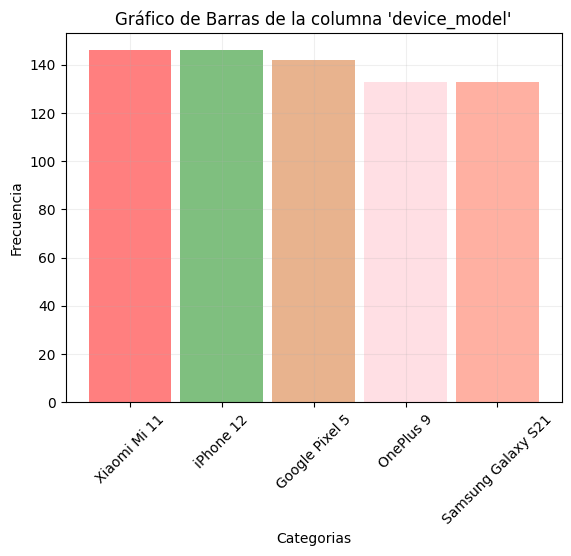

In [31]:
conteo = dataset["device_model"].value_counts()
colores = ['red', 'green', 'chocolate', 'pink', 'tomato']

conteo.plot(kind='bar', color=colores, width=0.9, alpha=0.5)

plt.title("Gráfico de Barras de la columna 'device_model'")
plt.xlabel("Categorias")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.2)
plt.xticks(rotation=45)
plt.show()

#### Creando un diagrama de torta (pie chart)

#### Creando un gráfico de conteo por categoria (Countplot)